In [22]:
import matplotlib.pyplot as plt

In [21]:
import numpy as np

# Exercise 1: Finite-precision arithmetic

## Part 1.  Explain the output of sys.float_info.


Run the following code snippet:

In [1]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

The float_info attribute outputs the following information about floating point representation in a single byte on a 64 bit computer:
1. `max / min`: the maximum(positive)/minimum(negative) floating point number that can be represented by a single byte
1. `max_exp/max_10_exp` : an integer x that can produce the maximum number that can be represented by a normalized float in the following manner : radix**(1-x) or 10**(x) respectively. Note radix is 2.
1. `min_exp/min_10_exp` : an integer x that can produce the minimum number that can be represented by a normalized float in the following manner : radix**(1-x) or 10**(x) respectively. Note radix is 2.
1. `dig/mant_dig` : The maximum number of decimal digits that can be faithfully represented in a float.
1. `mant_dig` : the number of base-radix(2) digits in the significand of a float.
1. `radix` : the base used for representing the float
1. `round` : flag for how python tries to round a floating number (nearest in this case)
1. `epsilon` : smallest value which can be added or subtracted to 1 such that the sum is faithfully representable by the float

## part 2:  Show how you can calculate the printed-out values max, min, epsilon yourself

According to the IEEE 754-1985 standard for a 64bit computer 
1. 1 bit is reserved for the sign of the float (sign bit), say a
1. 52 bits are used to represent the fraction of the float, say b
1. 11 bits are used to represent exponenet  of the float, say c
1. in addition float is represented in the normalized fashion, that is to say 1. is always assumed to be the first digit of the fraction
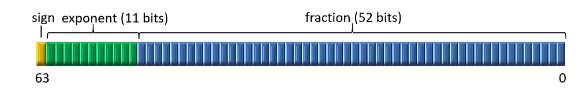

Each bit can either be 0 or 1.



For calculating the decimal number from the bit values the following formula can be used

$\pm M\cdot2^{E-e}$

$M=1.F$

where M is the mantissa E is the exponent and e is the bias. Bias, e, has a fixed value $(2^{11-1}-1=1023), 0<E<2^{2^{11}-2}$. Ehe exponenet $E$ has two less possibilities as `00000000000` and `11111111111` are reserved to represent to represent $0$ and $\infty $. In combination with the sign bit, they can also represent $-0$ and $-\infty$

**Calculating the max, min,  epsilon**

The code below calculates the maximum, min and epsilon. 


In [133]:
def calcdecfrombinary(F, E, signbit =0, e=2**10-1, mp =False):
    # lets ignore the sign bit for the moment 
    # the frac is 51 bits
    # exp is 11 bits
    
    def fractodec(F):
        div = 2
        dec =0
        for digit in F:
            dec += int(digit)/div
            div = div*2
        #print('F=',dec)
        return(dec)
    
    def exptodec(E):
        mul = 1
        dec =0
        for digit in list(E)[::-1]:
            dec += int(digit)*mul
            mul = mul*2
        #print('E =',dec)
        return(dec)
    
    M = 1+fractodec(F)
    
    if mp :
        E1 =e
    else:
        E1 = exptodec(E)
    m =2**(E1-e) 
    #print('m =',m,'(E1-e): ',(E1-e))
    number = M*m
    print(f'F =[{F}](binary), {M-1}(decimal), \nM = 1+F ={M}(decimal) \nE = [{E}](binary), {E1}(decimal)')
    return(number)

In [236]:
print('Decimal equivalent of a binary number is given by(ignoring the sign bit)')
print(f'M*2^(E-e), e is the bias, a constant(={2**10-1})' )
print('M = 1.F)\n' )

print('Maximum number possible to store')
print('='*80)
F='1'*52
E='1'*10+'0' # the last bit is to be 0 since 11 bits of all 1 represents infinity
print (f'Biggest number: {calcdecfrombinary(F,E)}')
print('\n')

print('Min positive number possible to store')
print('='*80)
F='0'*52 # all bits of fraction are 0
E='0'*10+'1' # the last bit is to be 1 since 11 bits of all 0 represents one
print (f'smallest number: {calcdecfrombinary(F,E)}')
print('\n')

print('Calculating machine precision')
print('='*80)
print('To represent 1, the both fraction, F, and Exponent, E-e, is all zeros ')
print('To represent number just higher than 1, the both fraction, F, is 51x0s followed by 1 ')
print('and Exponent, E-e, is all zeros => E=e')
F='0'*51+'1' 
E='1'*10 # equal to bias, e
epsilon = 1-calcdecfrombinary(F,E)
print (f'calculated machine precision: {epsilon}')
print('\n')

Decimal equivalent of a binary number is given by(ignoring the sign bit)
M*2^(E-e), e is the bias, a constant(=1023)
M = 1.F)

Maximum number possible to store
F =[1111111111111111111111111111111111111111111111111111](binary), 0.9999999999999998(decimal), 
M = 1+F =1.9999999999999998(decimal) 
E = [11111111110](binary), 2046(decimal)
Biggest number: 1.7976931348623157e+308


Min positive number possible to store
F =[0000000000000000000000000000000000000000000000000000](binary), 0.0(decimal), 
M = 1+F =1.0(decimal) 
E = [00000000001](binary), 1(decimal)
smallest number: 2.2250738585072014e-308


Calculating machine precision
To represent 1, the both fraction, F, and Exponent, E-e, is all zeros 
To represent number just higher than 1, the both fraction, F, is 51x0s followed by 1 
and Exponent, E-e, is all zeros => E=e
F =[0000000000000000000000000000000000000000000000000001](binary), 2.220446049250313e-16(decimal), 
M = 1+F =1.0000000000000002(decimal) 
E = [1111111111](binary), 1023(dec

**Extra:**
We can also show that the exponent is all 1's that we get an error OverflowError

In [235]:
# show that is the exponent is all 1 then we get infinite value (shown as Overflowerror)
F='1'*52
E='0'*11 # the last bit is to be 0 since 11 bits of all 1 represents infinity
print (f'Biggest number: {calcdecfrombinary(F,E)}')

print('\n')
F='1'*52
E='1'*11 # the last bit is to be 0 since 11 bits of all 1 represents infinity
print (f'Biggest number: {calcdecfrombinary(F,E)}')
print('\n')

F =[1111111111111111111111111111111111111111111111111111](binary), 0.9999999999999998(decimal), 
M = 1+F =1.9999999999999998(decimal) 
E = [00000000000](binary), 0(decimal)
Biggest number: 2.2250738585072014e-308




OverflowError: int too large to convert to float


## Part 3.

In Python, typing 0.1+0.2 does not (typically) produce the same output as 0.3.

In [35]:
class binNbit():
    '''
    class that takes a number a and 
    1. calculates the binary equivalent
    2. converts this binary equivalent to decimal 
    3. checks if the reverse conversion produces the same output
    this only works with +ve numbers below 1 for now.
    '''
    def __init__(self, a, n=16):
        self.n = n
        self.a = a
        self.bin = ''
        self.dec = 0.0
    def dec2bin(self):
        '''
        calculated the binary of number a with n bits of precision after decimal 
        (a)decimal = b(binary)
        b is of the form 0.xxxxxx... (n number of x's)
        n is the number of bits used for binary representation
        '''
        # To avoid the decimal separator, multiply the decimal number 
        # with the base raised to the power of decimals in result
        n = self.n
        a = int(self.a*2**n)
        #print(a)
        div = 2
        quotent = a
        reminder = ''

        for i in range(n):
            quotent = a//div
            reminder = str(int(a%div))+reminder
            #print(f'{a}/2',quotent, reminder, i)
            a=quotent
        self.bin = ('0.'+reminder)
        return(self.bin)
    
    def bin2dec(self ):
        '''
        calculated the decimal equivalent of a binary number b  
        (b)decimal = d(binary)
        b  is a string of the form 0.xxxxxx 
        '''
        # remove the decimal point
        b = self.bin[0]+self.bin[2:]
        div = 1
        dec =0
        for digit in b:
            dec += int(digit)/div
            div = div*2
        self.dec = dec
        return(self.dec)
    
    def __call__(self):
        
        self.dec2bin()
        self.bin2dec()
        return('there and back again : done')
    
    def issame(self):
        '''
        check the accuracy of the conversion
        '''
        if self.a == self.dec:
            return(f'decimal input {self.a} is equal machine decimal representation {self.dec}')
        else:
            return(f'decimal input {self.a} is *NOT* equal machine decimal representation {self.dec}')     
        
    def __repr__(self):
        ''' 
        represntation of the class
        '''
        self()
        return(f'input: {self.a}, {self.n} bit binary equiv: {self.bin}, decimal equiv:{self.dec}')

In [36]:
p = binNbit(0.2,8)
q = binNbit(0.2,16)
p, q

(input: 0.2, 8 bit binary equiv: 0.00110011, decimal equiv:0.19921875,
 input: 0.2, 16 bit binary equiv: 0.0011001100110011, decimal equiv:0.1999969482421875)

In [37]:
p.issame(), q.issame()

('decimal input 0.2 is *NOT* equal machine decimal representation 0.19921875',
 'decimal input 0.2 is *NOT* equal machine decimal representation 0.1999969482421875')

**Discussion:**

The above class takes a decimal number, $a$,  and the number of bits, $n$, that is to be used to represent in binary. It converts the *raw decimal* to its binary equivalent, $bin$, representing it in $n$ bits after decimal place. The class also converts the binary representation $bin$ back to decimal representation, $dec$. 

The class function `issame` tells us if the *raw decimal*  has been faithfully converted

When converting 0.2 to binary we get 0.0011(0011)...(repeting). Some part of 0.2 is always lost by truncation when converting to binary. With increased number of bits used to represent the decimal the precision is increased but it is impossible to reach 0.2 with finite number of bits. Thus 0.1 + 0.2 can never be equal to 0.3.

## Part 4.

Should you use the ==-operator to test whether two floating-point numbers are equal?
Why / why not? Can you think of alternative ways to do floating-point number comparison

In [40]:
print('Is 0.1+0.2==0.3:', 0.1+0.2 == 0.3)  # check if equality holds
print('Difference: 0.3-(0.1+0.2) =', 0.3-(0.1+0.2))  # difference
epsilon = 2**-16
print(f'alternative method 1:::  Is 0.3-(0.1+0.2) < {epsilon}:', 0.3-(0.1+0.2) < epsilon) # alternative method 1
print('alternative method 2::: np.isclose(0.1+0.2, 0.3):', np.isclose(0.1+0.2, 0.3)) # alternative method 2

Is 0.1+0.2==0.3: False
Difference: 0.3-(0.1+0.2) = -5.551115123125783e-17
alternative method 1:::  Is 0.3-(0.1+0.2) < 1.52587890625e-05: True
alternative method 2::: np.isclose(0.1+0.2, 0.3): True


**Discussion**

Since the system doesnt store 0.2  as 0.2 exactly so it is not advisable to compare with `== operator`. Two other  methods to compare 0.1+0.2 and 0.3 are shown above.

# Exercise 2: Get up to speed with NumPy

## Part 1.

The following code block gives an example of a vectorized function:

In [23]:
x = np.linspace(0, 1, 10)
ex=np.exp(x)  
emx=np.exp(-x)
x,ex,emx

(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 array([1.        , 1.11751907, 1.24884887, 1.39561243, 1.5596235 ,
        1.742909  , 1.94773404, 2.17662993, 2.43242545, 2.71828183]),
 array([1.        , 0.89483932, 0.8007374 , 0.71653131, 0.64118039,
        0.57375342, 0.51341712, 0.45942582, 0.41111229, 0.36787944]))

Notice the usage of np.exp instead of using the exponential function provided in the built-in math library; this is an example of a universal function.

* Create a native Python list of the same size as x and holding the same values. Apply the same two function calls to the list. Explain what happens.

In [46]:
xx = [i/9 for i in range(10)]
exx=np.exp(xx)  
emxx=np.exp(-1*xx)
xx,exx,emxx

([0.0,
  0.1111111111111111,
  0.2222222222222222,
  0.3333333333333333,
  0.4444444444444444,
  0.5555555555555556,
  0.6666666666666666,
  0.7777777777777778,
  0.8888888888888888,
  1.0],
 array([1.        , 1.11751907, 1.24884887, 1.39561243, 1.5596235 ,
        1.742909  , 1.94773404, 2.17662993, 2.43242545, 2.71828183]),
 array([], dtype=float64))

**Explanation:** Multiplying -1(0 or lower) to a built in python array returns an empty array. 

In [45]:
xx = [i/9 for i in range(10)]
exx=np.exp(xx)  
emxx=np.exp(-xx)
xx,exx,emxx

TypeError: bad operand type for unary -: 'list'

**Explanation** : the `operator +` in native python does not support addition of a list.

2. How would you generally evaluate a function on all elements of a native Python list? (as opposed to a NumPy array)

In [47]:
# native implementation
import math # math library is available in vanilla python

xx = [i/9 for i in range(10)]
exx=[math.exp(i) for i in xx]  
emxx=[math.exp(-i) for i in xx]
xx,exx,emxx

([0.0,
  0.1111111111111111,
  0.2222222222222222,
  0.3333333333333333,
  0.4444444444444444,
  0.5555555555555556,
  0.6666666666666666,
  0.7777777777777778,
  0.8888888888888888,
  1.0],
 [1.0,
  1.1175190687418637,
  1.2488488690016821,
  1.3956124250860895,
  1.5596234976067807,
  1.7429089986334578,
  1.9477340410546757,
  2.1766299317162483,
  2.4324254542872077,
  2.718281828459045],
 [1.0,
  0.8948393168143698,
  0.8007374029168081,
  0.7165313105737893,
  0.6411803884299546,
  0.5737534207374327,
  0.513417119032592,
  0.45942582403592663,
  0.41111229050718745,
  0.36787944117144233])

## Part 2.

As already hinted at, the NumPy library comes with a plethora of useful features and functions. The code snippets below show some examples: 

In [60]:
# Produce an array of size 20 with each element as 0

# numpy
np.zeros(20)

#native
[0]*20

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [61]:
# Produce an array of size 20 with each element as 1

#numpy
np.ones(20)

#native
[1]*20

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [63]:
# Produce a evenly spaced list of size 11, both the limits 0 and 10 are to be included 

#numpy
np.linspace(0, 10, 11)

#native
list(range(0,11))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [68]:
# from the numpy.linspace sourcecode
# div = (num - 1) if endpoint else num
# if endpoint is set to False, stop is excluded and 
# step is calculated by dividing by num instead of n-1

#numpy
np.linspace(0, 10, 11, endpoint=False,  retstep=True)

#native
[i*10/11 for i in range(11)]
np.linspace(0, 10, 11, endpoint=False,  retstep=False)-[i*10/11 for i in range(11)]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -8.88178420e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.77635684e-15])

In [69]:
# Produce a integer list [0,1,2,3,4], 
# add one to each element and multiply each element with 2

#numpy
vector = np.arange(5) + 1
2*vector

#native
[(i+1)*2 for i in range(5)]

[2, 4, 6, 8, 10]

## Part 3. 

In [70]:
array_of_numbers = np.array([4, 8, 15, 16, 23, 42,0,5])
nnz = np.count_nonzero(array_of_numbers)
print(f'There are {nnz} non-zero numbers in the array.')
is_even = (array_of_numbers % 2 == 0)
is_greater_than_17 = (array_of_numbers > 17)
is_even_and_greater_than_17 = is_even & is_greater_than_17

There are 7 non-zero numbers in the array.


In [86]:
# the logical operator 'and' can only perform logical and operation between 2 elements 
# thus the first line returns an exception
# for lists '&' can be used to perform bitwise operations
# the second line tries to perform 'and' between '0' abd array_of numbers and fail
# second line can be fixed by adding braces around each comparision 

is_even_and_greater_than_17 = is_even and is_greater_than_17
print((array_of_numbers % 2 == 0) & (array_of_numbers > 17))
print(np.logical_and((array_of_numbers % 2 == 0),(array_of_numbers > 17)))

[False False False False False  True False False]
[False False False False False  True False False]


## Part 4. 

In [91]:
array_of_numbers

array([ 4,  8, 15, 16, 23, 42,  0,  5])

In [99]:
#return the index of the array where the condition is satisfied
np.where(array_of_numbers > 17)[0]

array([4, 5])

In [100]:
# return an array with 1 where condition is true and 0 where condition is false
np.where(array_of_numbers > 17, 1, 0)

array([0, 0, 0, 0, 1, 1, 0, 0])

# Exercise 3, Part I: Finite Differences (FD) with Functions

In scientific computing one often needs to calculate derivatives of functions. For problems encountered in practice, exact formulas may not be available, in which case numerical estimates are needed. However, to evaluate the correctness of our programmed numerical methods, it is still a very good idea to test the code on simple functions where the derivative is known.

In this exercise, we consider a function that is relevant for describing wave phenomenona:
\begin{equation}
f(x) = \sin (b  x) \cdot e ^ {-ax^2}
\label{eq:waveleteq} 
\end{equation}

## Part 1.

It is always a good idea to start by visualizing the function in a plot.

1. Make a Python function that plots $f(x)$ from equation $\eqref{eq:waveleteq}$ over an arbitrary closed interval.
1. Use the function to plot $f(x)$ in the range [−10,10]. Try to make your figure similar to the one shown in figure 1


In [138]:
def wavelet(x, a=0.1, b=10):
    '''
    the wave packet function with default paramaters a,b
    '''
    
    return(np.sin(b*x)*np.exp(-a*x**2))

Text(0.5, 1.0, 'Fig 1. A plot of x vs $f(x)$')

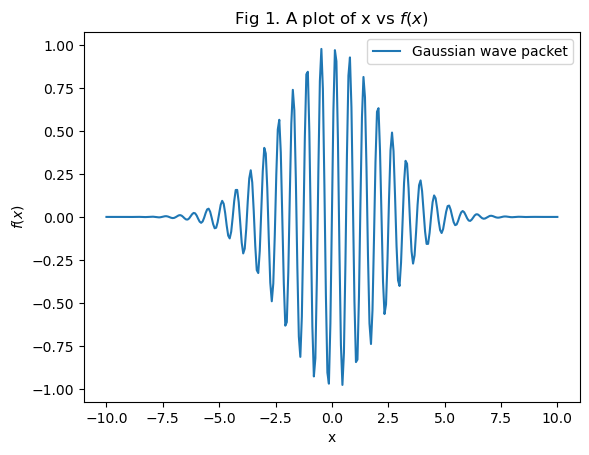

In [115]:
fig, ax = plt.subplots()
xll,xhl = -10,10
x = np.linspace(xll,xhl,301)
ax.plot(x, wavelet(x), label='Gaussian wave packet')
ax.set_xlabel('x')
ax.set_ylabel('$f(x)$')
plt.legend()
plt.title('Fig 1. A plot of x vs $f(x)$')


## Part 2.

The analytical derivative of $f(x)$ is

\begin{equation}
f'(x) = b \cos {bx} \cdot e ^ {-ax^2} -2ax  \sin (b  x) \cdot e ^ {-ax^2}
\label{eq:wldereq} 
\end{equation}

1. Write a Python function that calculates the derivative defined in equation $\eqref{eq:wldereq}$ (not the numerical derivative)


In [139]:
def wldereq(x, a=0.1, b=10):
    '''
    this function provides the analytic solution to the derivative of the wave packet function
    a,b:  default parameters
    '''
    t1 = np.exp(-a*x*x)
    t2 = b*np.cos(b*x)
    t3 = -2*a*x*np.sin(b*x)
    return (t2*t1 + t3*t1)

## Part 3.

Next, you are going to write a Python function that calculates the numerical derivative of an arbitrary single-variable function $f$ at a point $x$ using finite differences.

1. Write a Python function that calculates the derivative of an arbitrary function using the forward difference method (see section 3.3 in [4] ).
1. Apply your function to the particular case of equation (1) and x=1

. Use a suitable value of h, e.g. h=1e−2, and check that your estimate agrees reasonably well with the analytical solution.

In [125]:
def forwardderiv(x, f, dx, *fparams):
    ''' 
    this func calculates derivative of an arbirary function f. 
    f takes some arbitary arguments *params
    '''

    derivative = (f(x+dx, *fparams)-f(x, *fparams))/dx
    return (derivative)

In [142]:
'''
Compare the analytical derivtive of the wave packet function with the numerical one
Various dx values are chosen to show how the value converges with change in dx 
'''
x = 1
dx = 1e-2
# find numerical derivative of f(x) at x = 1
for ex in range(1,20):
    dx = 10**(-ex)
    print(f'Numerical derivative: {forwardderiv(x, wavelet, dx ):.6f} (dx= {dx})')

# find analytic derivative of f(x) at x = 1 (from the derivative function)
print(f'Analytic derivative : {wldereq(x):.6f}')

Numerical derivative: -3.937746 (dx= 0.1)
Numerical derivative: -7.220097 (dx= 0.01)
Numerical derivative: -7.467491 (dx= 0.001)
Numerical derivative: -7.491165 (dx= 0.0001)
Numerical derivative: -7.493521 (dx= 1e-05)
Numerical derivative: -7.493757 (dx= 1e-06)
Numerical derivative: -7.493780 (dx= 1e-07)
Numerical derivative: -7.493783 (dx= 1e-08)
Numerical derivative: -7.493784 (dx= 1e-09)
Numerical derivative: -7.493783 (dx= 1e-10)
Numerical derivative: -7.493789 (dx= 1e-11)
Numerical derivative: -7.494505 (dx= 1e-12)
Numerical derivative: -7.481793 (dx= 1e-13)
Numerical derivative: -7.455148 (dx= 1e-14)
Numerical derivative: -8.104628 (dx= 1e-15)
Numerical derivative: 0.000000 (dx= 1e-16)
Numerical derivative: 0.000000 (dx= 1e-17)
Numerical derivative: 0.000000 (dx= 1e-18)
Numerical derivative: 0.000000 (dx= 1e-19)
Analytic derivative : -7.493783


Text(0, 0.5, "Derivative, $f'(x)$ at $x=1$ ")

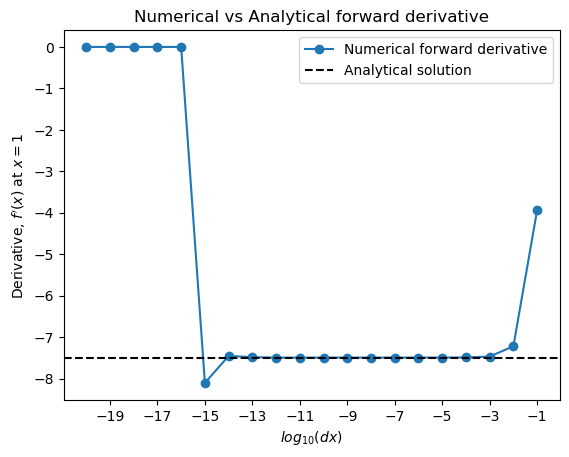

In [157]:
x= 1
ana = wldereq(x)
dxs = [10**-ex for ex in range(1,21)]
numericalder = [forwardderiv(x, wavelet, dx ) for dx in dxs]

fig, ax = plt.subplots()
ax.plot(np.log10(dxs), numericalder, label= 'Numerical forward derivative', marker ='o')
ax.axhline(ana, label ='Analytical solution', color='k', linestyle ='--')
ax.set_xticks(range(-1,-20,-2))
ax.legend()
ax.set_title('Numerical vs Analytical forward derivative')
ax.set_xlabel('$log_{10}(dx)$')
ax.set_ylabel("Derivative, $f'(x)$ at $x=1$ ")


**Discussion:**
1. with dx set to 1e-3 or lower (>1e-14) the approximation of the derivative of $f(x)_{x=1}$ reaches a stable value close to the analytic derivative value
1. with dx set to 1e-15 the result is not accurate
1. it makes sense that as the value of $dx$ is lowered one gets closer and closer to the analytic solution. But it is not clear why 1e-15 produces incorrect result
1.  it is interesting to note that with $dx$ less than the machine precision,$\epsilon$ (<1e-16) the results calculated is 0. this is because $f(x+dx) = f(x)$ for $dx < \epsilon$ 

##  Part 4.

* Write another Python function that calculates $f′(x)$ with the central difference method (see section 3.4 in [4]).

In [161]:
def centralder(x, f, dx, *fparams):
    ''' 
    this func calculates central derivative of an arbirary function f. 
    f takes some arbitary arguments *params
    '''
    fm = f(x-dx, *fparams)
    fp = f(x+dx, *fparams)
    der = (fp-fm)/2/dx
    return(der)

## Part 5.

Next, we wish to quantify the error in our numerical derivative approximations for the point x=1.

- For each of the two derivative approximations to $f′(1)$ (forward difference and central difference), make a scatter plot that shows the absolute error of the approximation on the y-axis versus the step size, $h$, on the x-axis. Include both error curves in the same figure. The step sizes should be varied logarithmically between $h=10^{-16}$ and $h=10^0=1$.
- Comment on what you observe in the figure you made. When is the numerical error smallest, and why? Is it what you expect from a theoretical analysis using Taylor's formula?

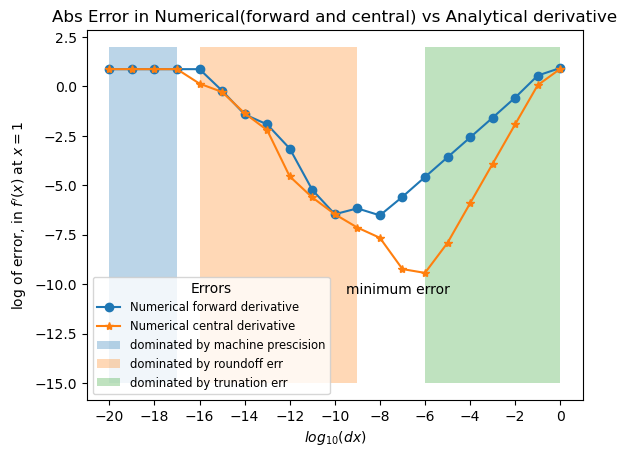

In [240]:
x= 1
ana = wldereq(x)
dxs = [10**-ex for ex in range(0,21)]
nforder = [forwardderiv(x, wavelet, dx ) for dx in dxs]
ncender = [centralder(x, wavelet, dx ) for dx in dxs]
errfwd = np.abs(nforder-ana)
errcnt = np.abs(ncender-ana)

fig, ax = plt.subplots()
ax.plot(np.log10(dxs), np.log10(errfwd), label= 'Numerical forward derivative', marker ='o')
ax.plot(np.log10(dxs), np.log10(errcnt), label= 'Numerical central derivative', marker ='*')
#ax.axhline(ana, label ='Analytical solution', color='k', linestyle ='--')
ax.set_xticks(range(0,-21,-2))

ax.set_title('Abs Error in Numerical(forward and central) vs Analytical derivative')
ax.set_xlabel('$log_{10}(dx)$')
ax.set_ylabel("log of error, in $f'(x)$ at $x=1$ ")

dxln = np.log10(dxs)
alpha=0.3
ax.fill_between(dxln,-15,2,where=dxln<-16 , alpha=alpha, label = 'dominated by machine prescision')
ax.fill_between(dxln,-15,2,where=(dxln>-17)&(dxln<-8), alpha=alpha, label = 'dominated by roundoff err' )
ax.fill_between(dxln,-15,2,where=(dxln>-7)&(dxln<1) , alpha=alpha, label = 'dominated by trunation err')
ax.annotate('minimum error',(-9.5,-10.5))
ax.legend(title= 'Errors', fontsize='small')

**Discussions:**
1. tylors equation blah blah.

# Exercise 3, Part II: FD with Classes

## Part 1.

* Add a function (instance method) to the class that returns the forward difference approximation to the derivative of the function f at a point x. Include both x and the step-size h as input arguments to the function.
* Add another second function which calculates the central difference approximation.

## Part 2.

* Make a third class function that, for any input x, creates scatter plots showing the absolute error of the two finite difference approximations of f′(x) versus step size. As before, choose step sizes in the range from $10^{−16}$ to $1$ (with logarithmic spacing).

Hint: You should re-use the first two functions when making the third one.

In [255]:
class WavePacket:
    """
    A class representation of a wave packet-function.
    """

    def __init__(self, a, b):
        self.a = a
        self.b = b

    def f(self, x):
        return np.sin(self.b*x)*np.exp(-self.a*x*x)

    def dfbydx(self, x):
        '''
        this function provides the analytic solution to the derivative of the wave packet function
        x: position at which derivative is to be calculated
        '''
        t1 = np.exp(-self.a*x*x)
        t2 = self.b*np.cos(self.b*x)
        t3 = -2*self.a*x*np.sin(self.b*x)
        return (t2*t1 + t3*t1)

    def fwd_diff(self, x, h):
        '''
        forwards difference of x with step of h
        '''
        res = (self.f(x+h)-self.f(x))/h
        return res

    def cent_diff(self, x, h):
        '''
        central difference of x with step of h
        '''
        res = (self.f(x+h)-self.f(x-h))/h/2
        return res

    def plot_err(self, x, h_min=-16, h_max=0):
        '''
        plot errors vs stepsize
        x the value at which the error is to be evaluated
        h_min/max: limits of the step size, to be split in log scale
        '''
        num = int(np.abs(h_min-h_max)+1)
        h = np.logspace(h_max, h_min, num=num)
        anader = self.dfbydx(x)
        fderr = np.abs(self.fwd_diff(x, h) - anader)
        cderr = np.abs(self.cent_diff(x, h) - anader)
                
        fig, ax = plt.subplots()
        ax.scatter(h,fderr,marker='o', label ='forward diff')
        ax.scatter(h,cderr,marker='*', label ='central diff')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('step size, h')
        ax.set_ylabel('error, h')
        ax.set_title('Step size vs Error for function $f(x) = \sin({bx})e^{-ax^2} $')
        plt.legend()
        plt.grid()
        
        

    def plot(self, ax, x_min=-10, x_max=10, dx=0.01):
        """
        A simple plotting routine for plotting f(x) in some range.
        """
        x = np.arange(x_min, x_max, dx)
        y = self.f(x)
        ax.plot(x, y)
        ax.grid()
        return (ax)

    def __call__(self, x):
        return self.f(x)

(None, None)

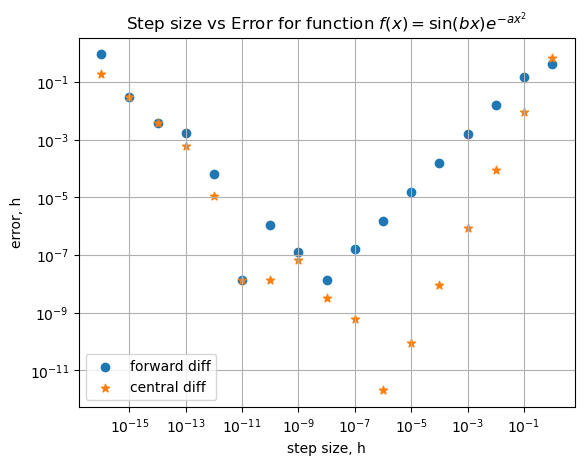

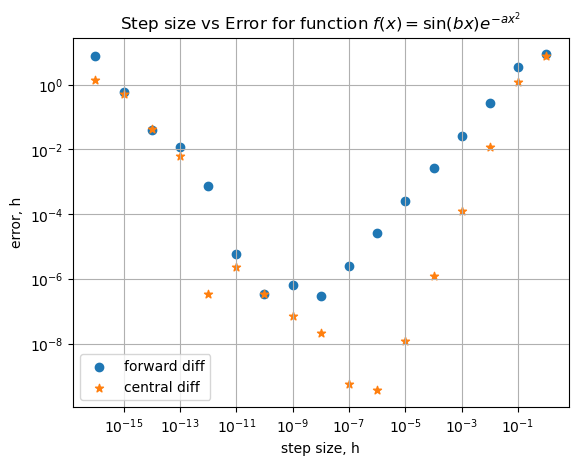

In [261]:
WP1 = WavePacket(0.1, 2)  # a=0.1, b=2
WP2 = WavePacket(0.1, 10)  # a = 0.1, b=10

WP1.plot_err(1),WP2.plot_err(1) 

In [255]:
WP1 = WavePacket(0.1, 2)  # a=0.1, b=2
WP2 = WavePacket(0.1, 10)  # a = 0.1, b=10


# Evaluate the two functions at a specific point
x = np.array([1, 2])
print(WP1(x))  # If WP1 had been a function, the syntax would be the same here!
# Again, we no longer have to type "WP2.f(x)", we can do "WP2(x)".
print(WP2(x))

[ 0.82276634 -0.50729988]
[-0.49225066  0.6119655 ]


In [284]:
h_min=-16 
h_max=0
num = int(np.abs((h_min-h_max))+1)
h = np.logspace(h_min, h_max, num=num)
print(h)

[1.e-16 1.e-15 1.e-14 1.e-13 1.e-12 1.e-11 1.e-10 1.e-09 1.e-08 1.e-07
 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]


In [ ]:
np.logspace()

In [281]:
h_min

1e-16

<Axes: >

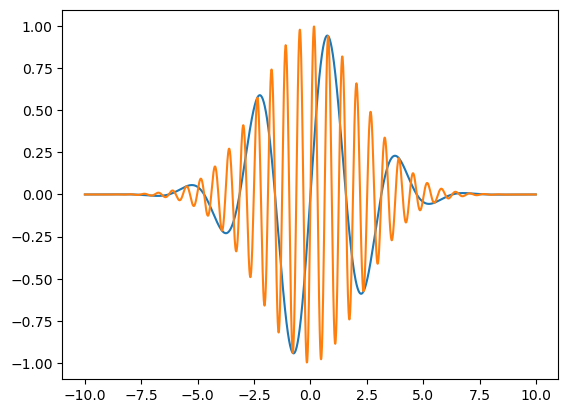

In [258]:
fig, ax = plt.subplots()
WP1.plot(ax)
WP2.plot(ax)

In [262]:
1e-3

0.001

In [214]:
dxs = np.array([10**-ex for ex in range(0,21)])
nforder1 = forwardderiv(x, wavelet, dxs )
nforder2 = [forwardderiv(x, wavelet, dx ) for dx in dxs]
nforder1-nforder2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [194]:
a = np.abs(nforder-ana) 
b = np.abs(ncender-ana)
amin, bmin =a.min(), b.min()
text = (f'the error is minimum: \n'\
        f'for forward derivative error ={amin:0.5e} when dx ={dxs[np.where(a==amin )[0][0]]}\n'
        f'for central derivative error ={bmin:1.5e} when dx ={dxs[np.where(b==bmin )[0][0]]}' )
print(text)


the error is minimum 
for forward derivative error =3.00018e-07 when dx =1e-08
for central derivative error =3.68657e-10 when dx =1e-06


**Discussion:**
In addition to the discussions above for the forward derivative graph the following should be noted.
1. Central difference derivative approches the 'real value' of the derivative quicker than forward derivative
1. It is interesting that the error in central derivative is much lower when $dx$ approches $\epsilon$
1. the absolute error (between numeric and analytic solution) is minimum at $dx = 1e-8$ for forward difference method
1. the absolute error (between numeric and analytic solution) is minimum at $dx = 1e-6$ for central difference method.
1. **WHY???**
1. clearly central difference method is prefereable since we can achive higher accuracy in calculation for larger gridsize

In [195]:
np.sin??